In [1]:
from collections import defaultdict as dt
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
def plot_correlation_matrix(data,count,title,color):
    freq={}
    for i in data:
        for j in i:
            if j in freq:
                freq[j]+=1
            else:
                freq[j]=1
    words=[j for j,k in sorted(freq.items(),key=lambda i:i[1],reverse=True)[:count]]
    words_set=set(words)
    corr_mat=dt(int)
    for i in data:
        for j in range(len(i)):
            for k in range(len(i)):
                if i[j] in words_set and i[k] in words_set:
                    corr_mat[i[j],i[k]]+=1
    mat=[]
    for i in range(len(words)):
        mat.append([])
        for j in range(len(words)):
            if i==j:
                mat[-1].append(1)
                continue
            a,b=words[i],words[j]
            n11=corr_mat[a,b]
            n10=freq[a]-n11
            n01=freq[b]-n11
            n00=len(data)-(n01+n10+n11)
            z=((n11+n10)*(n11+n01)*(n00+n01)*(n00+n10))**.5
            
            mat[-1].append((n11*n00 - n10*n01)/z)
    if title[0]=='T':
        file=open("title_words_correlation.csv",'w',encoding="utf-8")
        file.write("word1,word2,correlation\n")
    else:
        file=open("authors_correlation.csv",'w',encoding="utf-8")
        file.write("author1,author2,correlation\n")
    for i in range(len(mat)):
        for j in range(len(mat)):
            file.write(words[i]+","+words[j]+","+str(mat[i][j])+"\n")
    for i in range(len(words)):
        mat[i][i]=0
    df=pd.DataFrame(mat)
    df.index=words
    df.columns=words
    plt.figure(figsize = (20,15))
    plt.title(title)
    fig=sn.heatmap(df,cmap=color)
    fig.get_figure().savefig(title+".png")

In [2]:
title_data=[[j.strip() for j in i.split() if j.strip()!=''] for i in open("../data.txt",encoding="utf-8")]

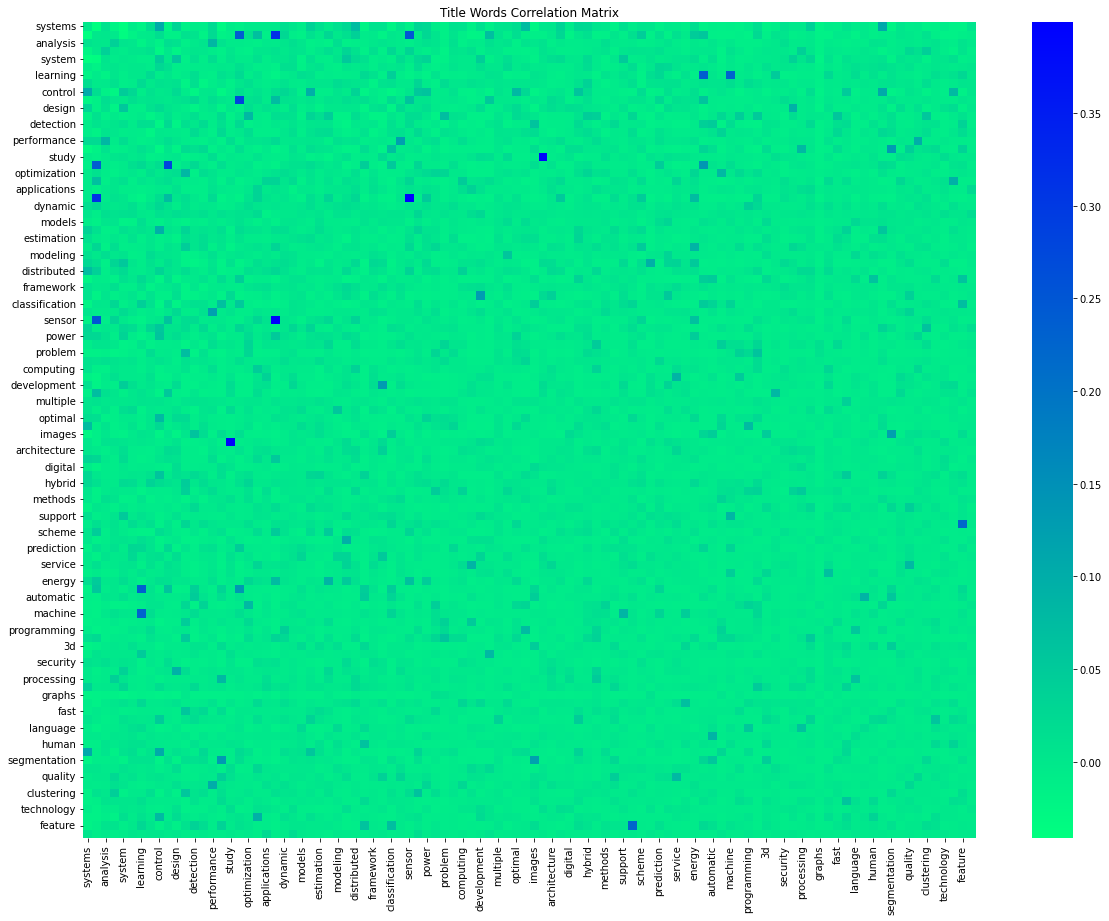

In [3]:
plot_correlation_matrix(title_data,100,"Title Words Correlation Matrix",'winter_r')

In [4]:
author_data = [[j.strip() for j in i[2:].split(",") if j.strip()!=''] for i in 
               open("../dblp.txt",encoding="utf-8") if len(i)>2 and i[1]=='@']

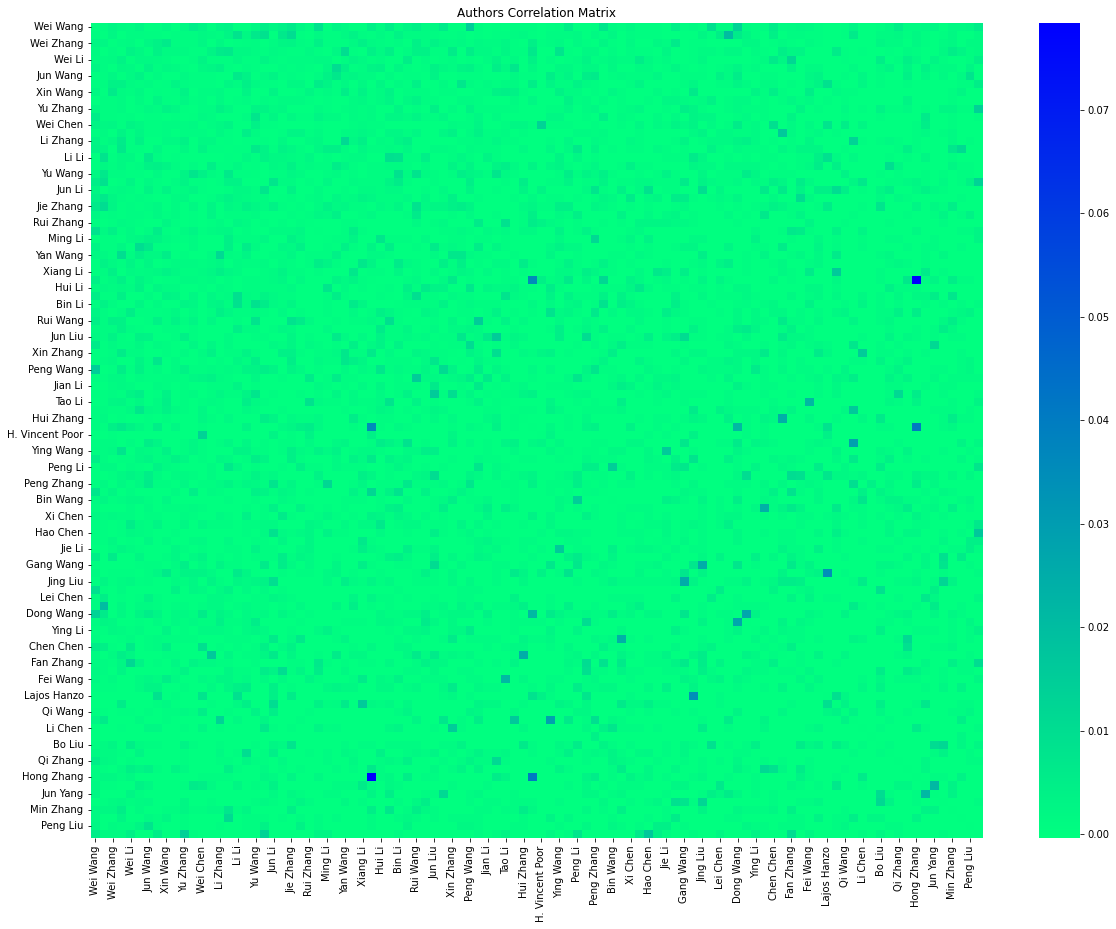

In [5]:
plot_correlation_matrix(author_data,100,"Authors Correlation Matrix",'winter_r')